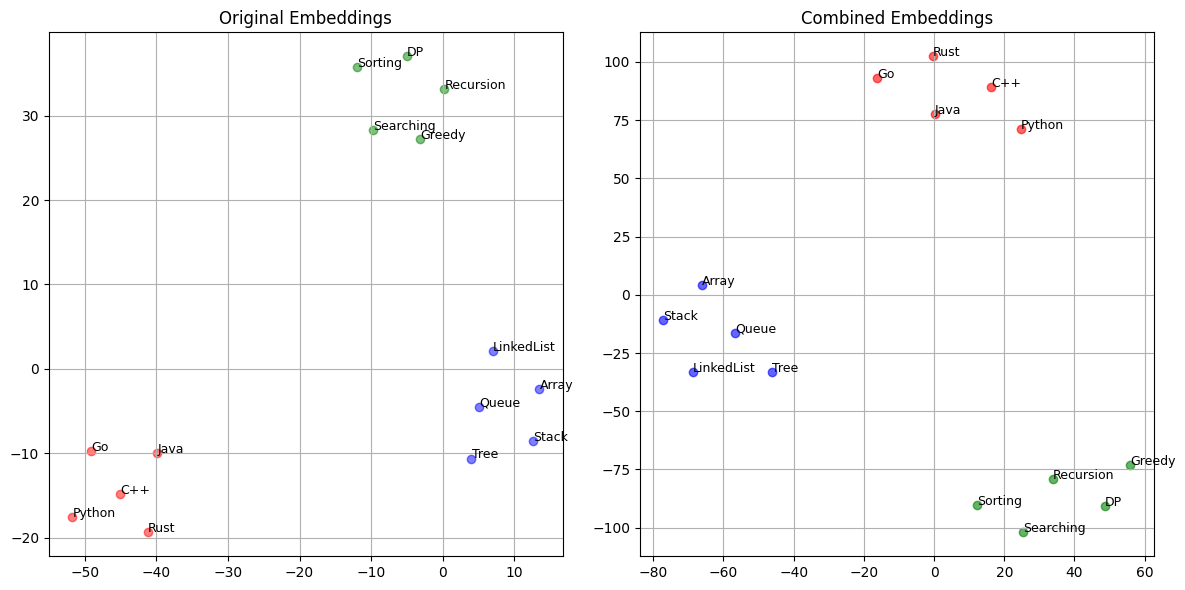

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#Define meningful word categroies
word_categories = {
    "Pgrming Language":["Python", "C++", "Java", "Rust", "Go"],
    "Data Structure":["Array", "Stack", "Queue", "LinkedList", "Tree"],
    "Algorithum": ["Sorting", "Searching", "Recursion", "DP", "Greedy"],
}

word_embeddings = {}

# Generate cluster-based word embeddings
for category, words in word_categories.items():
  cluster_center = np.random.rand(128) # Each category has a central vector
  for word in words:
    word_embeddings[word] = cluster_center + np.random.normal(0, 0.3, size=128) # Adding some variation

# Generate positional encodings
def generate_positional_encodings(seq_len, dim):
  pe = np.zeros((seq_len, dim))
  for pos in range(seq_len):
    for i in range(0, dim, 2):
      pe[pos, i] = np.sin(pos / (10000 ** ((2 * i) / dim))) # Formula USED
      if i + 1 < dim:
        pe[pos, i + 1] = np.cos(pos / (10000 ** ((2 * (i + 1)) / dim))) # Formula USED
  return pe

# Add positional encodings to embeddings
seq_len = len(word_embeddings)
dim = 128
positional_encodings = generate_positional_encodings(seq_len, dim)

words = list(word_embeddings.keys())
combined_embeddings = {}
for i, word in enumerate(words):
  combined_embeddings[word] = word_embeddings[word] + positional_encodings[i] # Adding position info


# Visualization function (f-SNE)
def plot_embeddings_side_by_side(embeddings1, title1, embeddings2, title2, categories):
  words1 = list(embeddings1.keys())
  vectors1 = np.array(list(embeddings1.values()))

  words2 = list(embeddings2.keys())
  vectors2 = np.array(list(embeddings2.values()))


  tsne = TSNE(n_components=2, perplexity=5, random_state=42)
  reduced_vectors1 = tsne.fit_transform(vectors1)
  reduced_vectors2 = tsne.fit_transform(vectors2)

  fig, axs = plt.subplots(1, 2, figsize=(12, 6))

  category_colors = {
      "Pgrming Language": "red",
      "Data Structure": "blue",
      "Algorithum": "green",
  }

  # Plot original embeddings
  for word in words1:
    category = next(key for key, values in categories.items() if word in values)
    color = category_colors[category]
    idx = words1.index(word)

    axs[0].scatter(reduced_vectors1[idx, 0], reduced_vectors1[idx, 1], color=color, alpha=0.5)
    axs[0].text(reduced_vectors1[idx, 0] + 0.02, reduced_vectors1[idx, 1] + 0.02, word, fontsize=9)


  axs[0].set_title(title1)
  axs[0].grid()


  # Plot embeddings with positional encoding

  for word in words2:
      category = next(key for key, values in categories.items() if word in values)
      color = category_colors[category]
      idx = words2.index(word)


      axs[1].scatter(reduced_vectors2[idx, 0], reduced_vectors2[idx, 1], color=color, alpha=0.6)
      axs[1].text(reduced_vectors2[idx, 0] + 0.02, reduced_vectors2[idx, 1] + 0.02, word, fontsize=9)

  axs[1].set_title(title2)
  axs[1].grid()


  plt.tight_layout()
  plt.show()

# Plot side, by side original vs positional encoding added
plot_embeddings_side_by_side(
  word_embeddings, "Original Embeddings",
  combined_embeddings, "Combined Embeddings",
  word_categories
)